In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('./amazon-orders_anonymous.csv')
orders.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


### Business questions
1. What is the total amount spent on amazon?
2. What is the minimum, maximum, average expenditure?
3. How is the money spent over time (by month)?
4. Does day of the week effect expenditure?
5. How much money has been paid in sales tax?


### Data Cleaning
* Remove features that do not contribute towards our business questions
* Handle missing values
* Modify the data types of columns
* Rename the columns to avoid spaces in the names of columns

In [3]:
# Remove inessential data (Those columns which do not contribute to our business questions.)

orders = orders.drop(['Payment Instrument Type', 'Website', 'Ordering Customer Email', 'Shipping Address Name',
                      'Shipping Address Street 1', 'Shipping Address Street 2', 'Shipping Address City',
                      'Shipping Address State', 'Shipping Address Zip', 'Buyer Name'], axis=1)

In [4]:
# Handle NaN values 
orders.isnull().sum()

Order Date                         0
Order ID                           0
Purchase Order Number             59
Shipment Date                      0
Order Status                       0
Carrier Name & Tracking Number     0
Subtotal                           0
Shipping Charge                    0
Tax Before Promotions              0
Total Promotions                   0
Tax Charged                        0
Total Charged                      0
Group Name                        59
dtype: int64

In [6]:
# Drop the below columns with NaN values
orders = orders.drop(['Purchase Order Number', 'Group Name'], axis=1)

In [7]:
# Rename the columns
orders.columns = orders.columns.str.replace(' ', '_')

In [8]:
# Extract the numeric part of Pice and omit '$' symbol
def get_price(price):
    return price.split('$')[1]

In [9]:
# Assign appropriate data types to columns

# Drop '$' symbol from columns with money data.
orders['Subtotal'] = orders['Subtotal'].apply(lambda x: get_price(x))
orders['Shipping_Charge'] = orders['Shipping_Charge'].apply(lambda x: get_price(x))
orders['Tax_Before_Promotions'] = orders['Tax_Before_Promotions'].apply(lambda x: get_price(x))
orders['Total_Promotions'] = orders['Total_Promotions'].apply(lambda x: get_price(x))
orders['Tax_Charged'] = orders['Tax_Charged'].apply(lambda x: get_price(x))
orders['Total_Charged'] = orders['Total_Charged'].apply(lambda x: get_price(x))

# Modify the data types of columns
convert_dict = {'Subtotal': float, 'Shipping_Charge': float, 'Tax_Before_Promotions': float, 
                'Total_Promotions': float, 'Tax_Charged': float, 'Total_Charged': float}

orders = orders.astype(convert_dict)
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
orders['Shipment_Date'] = pd.to_datetime(orders['Shipment_Date'])

In [10]:
orders.columns

Index(['Order_Date', 'Order_ID', 'Shipment_Date', 'Order_Status',
       'Carrier_Name_&_Tracking_Number', 'Subtotal', 'Shipping_Charge',
       'Tax_Before_Promotions', 'Total_Promotions', 'Tax_Charged',
       'Total_Charged'],
      dtype='object')

In [11]:
orders.head()

,Order_Date,Order_ID,Shipment_Date,Order_Status,Carrier_Name_&_Tracking_Number,Subtotal,Shipping_Charge,Tax_Before_Promotions,Total_Promotions,Tax_Charged,Total_Charged
0,2019-04-01,112-0000000-0000001,2019-04-01,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93
1,2019-04-01,112-0000000-0000002,2019-04-01,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99
2,2019-04-01,112-0000000-0000003,2019-04-01,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99
3,2019-04-04,112-0000000-0000004,2019-04-05,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12
4,2019-04-05,112-0000000-0000005,2019-04-07,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99


### Data Exploration

In [12]:
# 1. What is the total amount spent on amazon?

orders['Total_Charged'].sum()

1777.7300000000002

In [15]:
# 2. What is the minimum, maximum, average expenditure?

print('Minimum amount purchase made on Amazon is of', orders['Total_Charged'].min(), 'USD')
print('Maximum amount purchase made on Amazon is of', orders['Total_Charged'].max(), 'USD')
print('Average amount spent on Amazon purchases is of', orders['Total_Charged'].mean(), 'USD')

Minimum amount purchase made on Amazon is of 1.04 USD
Maximum amount purchase made on Amazon is of 210.99 USD
Average amount spent on Amazon purchases is of 30.131016949152542 USD


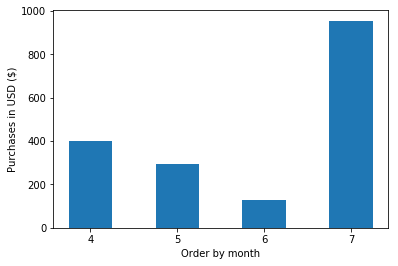

In [18]:
# 3. How do purchases trend by month?

# Extract month of Order date
order_month_col = pd.DatetimeIndex(orders['Order_Date']).month
orders.insert(loc=3, column='Order_Month', value=order_month_col)


# plot a bar graph.

months = orders['Order_Month'].unique()
orders_by_month = orders.groupby(['Order_Month'])['Total_Charged'].sum()

plt.bar(months, orders_by_month, width=0.5)
plt.xticks(months)
plt.ylabel('Purchases in USD ($)')
plt.xlabel('Order by month')
plt.show()

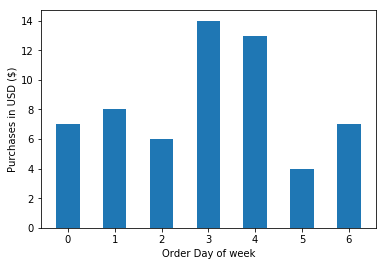

In [19]:
#  4. Does day of the week effect expenditure?

# Extract day of week of Order date
order_day_col = pd.DatetimeIndex(orders['Order_Date']).dayofweek
orders.insert(loc=4, column='Order_Dayofweek', value=order_day_col)


# plot a bar graph.

days = orders['Order_Dayofweek'].unique()
orders_by_day = orders.groupby(['Order_Dayofweek'])['Total_Charged'].count()

plt.bar(days, orders_by_day, width=0.5)
plt.xticks(days)
plt.ylabel('Purchases in USD ($)')
plt.xlabel('Order Day of week')
plt.show()

In [21]:
# 5. How much money has been paid in sales tax?

print('Total amount spent on sales tax is of', orders['Tax_Charged'].sum(), 'USD')

Total amount spent on sales tax is of 52.60999999999999 USD
